# 	Softmax Regression 

Mulitclass หรือ mulitlabel ส่วนใหญ่ผมชอบคิดคำว่า label เยอะให้ทุกคนเข้าใจตรงกันว่า คือตัวเดียวกัน

- class / label คือ ผลลัทธ์ที่เราจะต้องการเช่น [หมา แมว คน]

- Feature/data คือ ตัวที่เราใส่เข้าไปแล้วต้องการออกเป็น label

ในที่นี้ผมจะใช้ Feature / label ชะส่วนใหญ่นั้นเอง

โดยเรื่องก่อนหน้าจะนำ logistic (sigmoid) มาทำการเดา เข้าสมการให้มีการวาดเส้น มากกว่า 0.5 คือ จริง น้อยกว่า คือ ไม่จริง

แต่เรื่องนี้เราไม่ได้มีแค่จริงไม่จริง อาจจะมีหลาย label เช่น หมา,แมว,คน,นก

ปกติ label เราจะเป็น 0,1 เมื่อบทที่แล้ว ในเรื่องนี้ก็เหมือนกันแต่แปลงเป็น หลาย columns แทน 

ยังไง?

โดยผมจะเสนอเทคนิคชื่อว่า one hot vector ก่อนและค่อยเป็นแบบ index ซึ่งใช้ loss function ต่างกัน

# one hot vector

เราอาจจะบอกว่า หมา คือตำแหน่ง 1, แมวตำแหน่ง 2, คนตำแหน่ง 3, นก ตำแหน่ง 4

ถ้า ai จะบอกว่าอันนี้เป็นหมา จะส่ง $\hat{y} = [1,0,0,0]$ ชึ่งอันนี้คือหมายความว่าเป็น หมา

ถ้าเป็น คน จะส่ง $\hat{y} = [0,0,1,0]$

ถ้าเป็น นก ละ?  [0,0,0,1]

แต่ความเป็นจริงแล้วมันอาจจะส่ง [0.2,0.3,0.1,0.7] แล้วเราต้องหาค่าที่เยอะที่สุด บอกเป็นสิ่งนั้น

# softmax คืออะไร

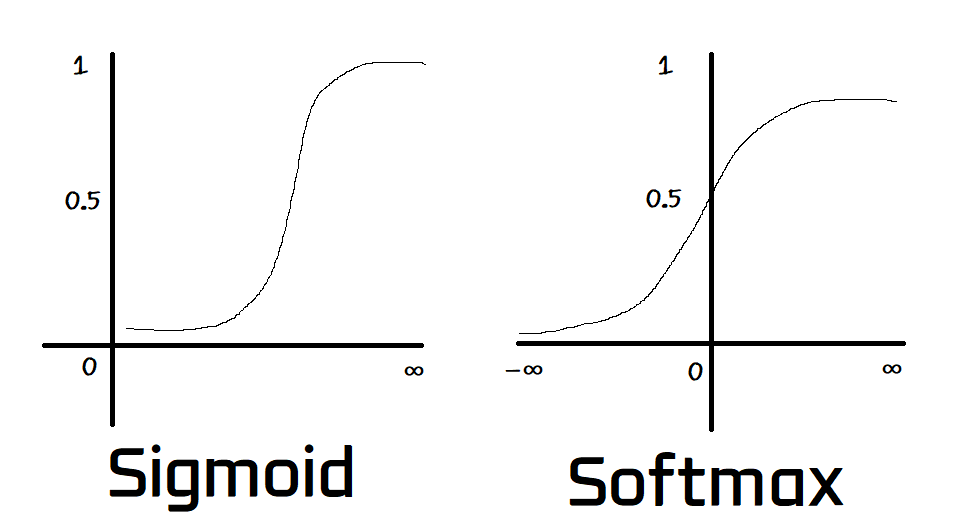

ซึ่งจำได้ว่า z = $w_o+w_1x_1+w_2x_2+...+w_nx_n$ ในเรื่องนี้ก็เหมือนกัน

จากรูปทำให้เราเห็นได้ว่า มีความคล้ายกันในสมการ sigmoid กับ softmax

สมการ softmax  $\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$

$z_j$ : logit (ค่า score) ของ class j


K: จำนวน class ทั้งหมด

$σ(z) ∈(0,1): ความน่าจะเป็นที่  class = j$

สมมุติว่า เราว่า label หมา แมว นก โดยให้ w 1 ทุกตัว แล้ว x มี น้ำหนัก ส่วนสูง ความเร็วในการเคลื่อนที่

หมา z = $w_0+w_1x_1+w_2x_2+w_3x_3$ = 1+5+0.9+12 = 18.9

แมว z = $w_0+w_1x_1+w_2x_2+w_3x_3$ = 1+3+0.4+16 = 20.4

นก z = $w_0+w_1x_1+w_2x_2+w_3x_3$ = 1+1.2+1.6+30 = 33.8

softmax $\sigma(z)_{หมา} = \frac{e^{หมา}}{\sum_{k=1}^{K} e^{z_k}} =\frac{e^{18.9}}{e^{18.9}+e^{20.4}+e^{80.6}}$ = ความน่าจะเป็น หมา = $0.00000034$  น้อยมาก

เราเลยต้องมีการทำอัปเดท $w_i$

ผลจากการเข้า softmax ทั้งหมด จาก $w$ = 1 ทั้งหมด

| คลาส         | Logit $z$ | Softmax ความน่าจะเป็น |
| ------------ | --------- | --------------------- |
| 🐶 หมา (dog) | 18.9      | ≈ **0.00000034**      |
| 🐱 แมว (cat) | 20.4      | ≈ **0.00000152**      |
| 🐦 นก (bird) | 33.8      | ≈ **0.99999815**      |


ซึ่งเราจำเป้นต้อง อัป w โดย grad ใช้ loss function Cross-Entropy

ดังนั้นเราต้องมี weights =[[หมา][แมว][นก]] แยกแต่ละตัว


# Cross-Entropy

$$
\mathcal{L} = -\sum_{i=1}^{K} y_i \log(\hat{y}_i)
$$


เราเดาหมาใน w=1 ได้ $3.4*10^{-7}$

loss fucntion คำนวนได้ $y_i = [1,0,0] \hat{y_i} = [3.4*10^{-7},1.52*10^{-6},0.99]$

$L_{หมา} = -(1*log(3.4^{-7})+0*log(1.52*10^{-6})+0*log(0.99))$

$L_{หมา} = - 1*log(3.4^{-7})$ = 14.89

อันบนคือวิธีหาร lossfunction แบบ ตัวเดียวๆ

ถ้าจะทั้งหมดคือสมการนี้

$$\mathcal{L} = -\frac{1}{m} \sum_{j=1}^{m} \sum_{i=1}^{K} y^{(j)}_i \log(\hat{y}^{(j)}_i)$$

In [2]:
def cross_entropy_loss(y_true, y_pred):
    """
    y_true: numpy array shape (m, K) - one-hot labels
    y_pred: numpy array shape (m, K) - predicted probabilities (softmax output)
    """
    eps = 1e-15  # ป้องกัน log(0)
    y_pred_clipped = np.clip(y_pred, eps, 1 - eps)

    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred_clipped)) / m

    return loss

การป้องกัน log(0) และค่าที่น้อยกว่า 1e-15

$$
\hat{y}_{i,\text{clipped}}^{(j)} = 
\begin{cases}
\varepsilon & \text{if } \hat{y}_i^{(j)} < \varepsilon \\[6pt]
\hat{y}_i^{(j)} & \text{if } \varepsilon \leq \hat{y}_i^{(j)} \leq 1 - \varepsilon \\[6pt]
1 - \varepsilon & \text{if } \hat{y}_i^{(j)} > 1 - \varepsilon
\end{cases}
$$

โดยจะคำนวนทั้งหมด แล้วหา ค่า เฉลี่ยหารด้วย m คือจำนวนข้อมูลทั้งหมด


Gradient คือ

$\frac{\partial \mathcal{L}}{\partial \mathbf{W}} = \frac{1}{m} \mathbf{X}^\top (\hat{\mathbf{Y}} - \mathbf{Y})$

เมื่อ diff by w

# data

ผมจำลองข้อมูล หมา แมว นก เต๋า โดยข้อมูลจะมี น้ำหนัก(กิโล) ส่วนสูง(เมตร) ความเร็วในการเคลื่อนที่(กม/ชม) 

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = {
    "label": ["หมา","หมา","แมว","นก","หมา","เต๋า","หมา","แมว","แมว","เต๋า","เต๋า","นก","นก","นก"],
    "weight": [15,14,4,0.5,16,10,13,3.5,4.2,9,11,0.6,0.4,0.55],
    "height": [0.5,0.45,0.3,0.15,0.55,0.2,0.48,0.28,0.32,0.18,0.22,0.14,0.13,0.16],
    "speed": [30,28,40,50,32,2,29,38,41,1.5,2.3,48,52,49]
}

df = pd.DataFrame(data)
df

,label,weight,height,speed
0,หมา,15.00,0.50,30.0
1,หมา,14.00,0.45,28.0
2,แมว,4.00,0.30,40.0
3,นก,0.50,0.15,50.0
4,หมา,16.00,0.55,32.0
5,เต๋า,10.00,0.20,2.0
6,หมา,13.00,0.48,29.0
7,แมว,3.50,0.28,38.0
8,แมว,4.20,0.32,41.0
9,เต๋า,9.00,0.18,1.5


โดยแปลง คำว่าหมาแมวให้เป็น 0,1,2,3

In [5]:
mapping = {"หมา":0, "แมว":1, "นก":2, "เต๋า":3}

In [6]:
y_num = df["label"].map(mapping)
y_num

0     0
1     0
2     1
3     2
4     0
5     3
6     0
7     1
8     1
9     3
10    3
11    2
12    2
13    2
Name: label, dtype: int64

ทำ one hot

In [7]:
y_onehot = pd.get_dummies(y_num)

In [8]:
y_onehot

,0,1,2,3
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,True,False,False,False
5,False,False,False,True
6,True,False,False,False
7,False,True,False,False
8,False,True,False,False
9,False,False,False,True


In [9]:
y_onehot_n = y_onehot.to_numpy()
y_onehot_n

array([[ True, False, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False, False, False,  True],
       [ True, False, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False]])

ทำdata

เนื่องจาก data มี label ผมเลยเอาออก

In [10]:
x=df.drop(axis=1,columns=["label"])
x

,weight,height,speed
0,15.00,0.50,30.0
1,14.00,0.45,28.0
2,4.00,0.30,40.0
3,0.50,0.15,50.0
4,16.00,0.55,32.0
5,10.00,0.20,2.0
6,13.00,0.48,29.0
7,3.50,0.28,38.0
8,4.20,0.32,41.0
9,9.00,0.18,1.5


แปลง x เป็น numpy

In [11]:
X = x.to_numpy()
X

array([[15.  ,  0.5 , 30.  ],
       [14.  ,  0.45, 28.  ],
       [ 4.  ,  0.3 , 40.  ],
       [ 0.5 ,  0.15, 50.  ],
       [16.  ,  0.55, 32.  ],
       [10.  ,  0.2 ,  2.  ],
       [13.  ,  0.48, 29.  ],
       [ 3.5 ,  0.28, 38.  ],
       [ 4.2 ,  0.32, 41.  ],
       [ 9.  ,  0.18,  1.5 ],
       [11.  ,  0.22,  2.3 ],
       [ 0.6 ,  0.14, 48.  ],
       [ 0.4 ,  0.13, 52.  ],
       [ 0.55,  0.16, 49.  ]])

เพิ่ม $w_0$ โดยดารเพิ่ม 1 ข้างหน้า ให้ $w_0*1 = w_0$

In [12]:
X_w_0 = np.hstack([np.ones((X.shape[0], 1)), X])
X_w_0

array([[ 1.  , 15.  ,  0.5 , 30.  ],
       [ 1.  , 14.  ,  0.45, 28.  ],
       [ 1.  ,  4.  ,  0.3 , 40.  ],
       [ 1.  ,  0.5 ,  0.15, 50.  ],
       [ 1.  , 16.  ,  0.55, 32.  ],
       [ 1.  , 10.  ,  0.2 ,  2.  ],
       [ 1.  , 13.  ,  0.48, 29.  ],
       [ 1.  ,  3.5 ,  0.28, 38.  ],
       [ 1.  ,  4.2 ,  0.32, 41.  ],
       [ 1.  ,  9.  ,  0.18,  1.5 ],
       [ 1.  , 11.  ,  0.22,  2.3 ],
       [ 1.  ,  0.6 ,  0.14, 48.  ],
       [ 1.  ,  0.4 ,  0.13, 52.  ],
       [ 1.  ,  0.55,  0.16, 49.  ]])

# Softmax

In [13]:
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)  # ลบ max แต่ละแถว
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

gradient

In [14]:
def compute_gradient(X, y_true, y_hat):
    m = X.shape[0]
    dW = (1/m) * X.T @ (y_hat - y_true) 
    return dW.T

# train

อธิบาย 

learning_rate = 1e-4 ลองปรับตามเหมาะสม

In [15]:
learning_rate = 1e-4

 เรากำหนดให้ weights มีหา เท่ากับ 1 ทั้งหมด โดยกำหนดให้ 
 $$\begin{bmatrix}
    [1., 1., 1., 1.] ของ w_{หมา}\\
    [1., 1., 1., 1.] ของ w_{แมว}\\
    [1., 1., 1., 1.] ของ w_{นก}\\
    [1., 1., 1., 1.] ของ w_{เต๋า}\\
 \end{bmatrix}$$


In [32]:
weights=np.ones((y_onehot_n.shape[1],X_w_0.shape[1])) 
weights

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

โดยเราจะเห็น z = X_w_0 @ weights.T

$$\begin{bmatrix}1. & 15. & 0.5 & 30.\\
1. & 14. & 0.45& 28.  \\
.\\
..\\
...\\
\end{bmatrix}
*
\begin{bmatrix}1_{หมา},1_{แมว},1_{นก},1_{เต๋า}\\
1_{หมา},1_{แมว},1_{นก},1_{เต๋า}\\
1_{หมา},1_{แมว},1_{นก},1_{เต๋า}\\
1_{หมา},1_{แมว},1_{นก},1_{เต๋า}
\end{bmatrix}
=
\begin{bmatrix}1*1_{หมา}+15*1_{หมา}+0.5*1_{หมา}+30*1_{หมา} &,แมว&,นก&,เต๋า\\
1*1_{หมา}+14*1_{หมา}+0.45*1_{หมา}+28*1_{หมา}&,แมว&,นก&,เต๋า\\
.\\
..\\
...\\

\end{bmatrix}



In [17]:
z = X_w_0 @ weights.T
z

array([[46.5 , 46.5 , 46.5 , 46.5 ],
       [43.45, 43.45, 43.45, 43.45],
       [45.3 , 45.3 , 45.3 , 45.3 ],
       [51.65, 51.65, 51.65, 51.65],
       [49.55, 49.55, 49.55, 49.55],
       [13.2 , 13.2 , 13.2 , 13.2 ],
       [43.48, 43.48, 43.48, 43.48],
       [42.78, 42.78, 42.78, 42.78],
       [46.52, 46.52, 46.52, 46.52],
       [11.68, 11.68, 11.68, 11.68],
       [14.52, 14.52, 14.52, 14.52],
       [49.74, 49.74, 49.74, 49.74],
       [53.53, 53.53, 53.53, 53.53],
       [50.71, 50.71, 50.71, 50.71]])

46.5 คือ $x*w_{หมา}$, 46.5  $x*w_{แมว}$ , 46.5 $x*w_{นก}$ , 46.5 $x*w_{เต๋า}$

y_hat = 
$\begin{bmatrix}[P(x)_{หมา},P(x)_{แมว},P(x)_{นก},P(x)_{เต๋า}]\\
[P(x)_{หมา},P(x)_{แมว},P(x)_{นก},P(x)_{เต๋า}]\\
[P(x)_{หมา},P(x)_{แมว},P(x)_{นก},P(x)_{เต๋า}]\\
[P(x)_{หมา},P(x)_{แมว},P(x)_{นก},P(x)_{เต๋า}]\\
...
\end{bmatrix}$

P(x) = ความน่าจะเป็นของ x

In [18]:
y_hat = softmax(z)
y_hat

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

grad

In [19]:
y_hat,y_onehot_n

(array([[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]),
 array([[ True, False, False, False],
        [ True, False, False, False],
        [False,  True, False, False],
        [False, False,  True, False],
        [ True, False, False, False],
        [False, False, False,  True],
        [ True, False, False, False],
        [False,  True, False, False],
        [False,  True, False, False],
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True

In [20]:
y_hat-y_onehot_n

array([[-0.75,  0.25,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [ 0.25,  0.25,  0.25, -0.75],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25]])

In [21]:
(y_hat-y_onehot_n)

array([[-0.75,  0.25,  0.25,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [-0.75,  0.25,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25, -0.75,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -0.75],
       [ 0.25,  0.25,  0.25, -0.75],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25],
       [ 0.25,  0.25, -0.75,  0.25]])

In [22]:
X_w_0.T

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [15.  , 14.  ,  4.  ,  0.5 , 16.  , 10.  , 13.  ,  3.5 ,  4.2 ,
         9.  , 11.  ,  0.6 ,  0.4 ,  0.55],
       [ 0.5 ,  0.45,  0.3 ,  0.15,  0.55,  0.2 ,  0.48,  0.28,  0.32,
         0.18,  0.22,  0.14,  0.13,  0.16],
       [30.  , 28.  , 40.  , 50.  , 32.  ,  2.  , 29.  , 38.  , 41.  ,
         1.5 ,  2.3 , 48.  , 52.  , 49.  ]])

In [23]:
X_w_0.T @ (y_hat-y_onehot_n)

array([[ -0.5   ,   0.5   ,  -0.5   ,   0.5   ],
       [-32.5625,  13.7375,  23.3875,  -4.5625],
       [ -0.965 ,   0.115 ,   0.435 ,   0.415 ],
       [ -8.3   ,  -8.3   , -88.3   , 104.9   ]])

In [24]:
dw = compute_gradient(X_w_0,y_onehot_n, y_hat)
dw

array([[-0.03571429, -2.32589286, -0.06892857, -0.59285714],
       [ 0.03571429,  0.98125   ,  0.00821429, -0.59285714],
       [-0.03571429,  1.67053571,  0.03107143, -6.30714286],
       [ 0.03571429, -0.32589286,  0.02964286,  7.49285714]])

In [31]:
weights

array([[0.98687332, 1.12198711, 1.00473652, 1.00985275],
       [0.99857749, 0.89348863, 1.00117035, 1.05885542],
       [0.98881556, 0.74323758, 0.99057672, 1.0788121 ],
       [1.02573362, 1.24128668, 1.00351642, 0.85247973]])

In [33]:
weights=np.ones((y_onehot_n.shape[1],X_w_0.shape[1])) 
for epoch in range(3000):
    z = X_w_0 @ weights.T
    y_hat = softmax(z)
    loss = cross_entropy_loss(y_onehot_n, y_hat)
    
    dw = compute_gradient(X_w_0,y_onehot_n, y_hat)
    weights -= learning_rate * dw
    if epoch%100 ==0 :
        print("loss:",loss)



loss: 1.3862943611198906
loss: 1.090098977308137
loss: 0.9859056751283387
loss: 0.9123175024911373
loss: 0.8557613463463406
loss: 0.8102605583716996
loss: 0.7724229248271719
loss: 0.7401556046716605
loss: 0.7121002333193148
loss: 0.6873372813500291
loss: 0.6652203043661535
loss: 0.6452790782115907
loss: 0.6271610094701746
loss: 0.6105945389989833
loss: 0.5953655725805405
loss: 0.5813018588176805
loss: 0.5682623554334799
loss: 0.5561298120517822
loss: 0.5448054789736189
loss: 0.5342052532416839
loss: 0.5242568165641847
loss: 0.514897470778742
loss: 0.5060724726210327
loss: 0.49773373195049125
loss: 0.4898387788477896
loss: 0.48234993273691085
loss: 0.47523362560521115
loss: 0.4684598444748727
loss: 0.46200166743649007
loss: 0.4558348740456863


In [34]:
weights

array([[0.98687332, 1.12198711, 1.00473652, 1.00985275],
       [0.99857749, 0.89348863, 1.00117035, 1.05885542],
       [0.98881556, 0.74323758, 0.99057672, 1.0788121 ],
       [1.02573362, 1.24128668, 1.00351642, 0.85247973]])

ผมจะให้เดา นก โดยที่ผมใส่ไป [1,0.6,0.19,40.0] ซี่งผมจำลองให้เหมือนนก 

In [27]:
x_new = np.array([[1, 0.6, 0.14, 37.0]])  # รวม bias=1
z = x_new @ weights.T  # คำนวณ logits (shape = (4,))
y_hat = softmax(z)          # probability ของแต่ละคลาส
y_hat


array([[6.01459737e-02, 3.25049979e-01, 6.14605307e-01, 1.98739940e-04]])

In [28]:
print("Probabilities:", ", ".join(str(round(x,2)) for x in y_hat[0])) # แปลง ให้มองเห็นง่าย

Probabilities: 0.06, 0.33, 0.61, 0.0


ความน่าจะเป็นมากที่สุดคือ 0.61 ซึ่งตรงกับ นก

In [29]:
reverse_mapping = {v: k for k, v in mapping.items()}
predicted_class_index = np.argmax(y_hat)
predicted_label = reverse_mapping[predicted_class_index]
print("Predicted label:", predicted_label)

Predicted label: นก
